<img alt="Pascual logo" height="120px" src="https://github.com/andresperez86/Data_Analysis_20252/blob/master/cropped-Institucion_Pascual_Bravo_Logo.png?raw=true" align="center" hspace="10px" vspace="10px" style="width:520px;height:152px;">
<h1><font color='01b3c2'> <center>Multi-variate Exploratory Data Analysis (EDA) </font> </center>

<font  face="Courier New" size="3">
 <p><center>Prof. Andres Fernando Pérez  MSc.</center></p>
</font>

# **ANÁLISIS EXPLORATORIO DE DATOS (EDA) MULTIVARIADO**

#**Pre-requisito**

##*Se debe haber llevado a cabo el analisis univariado y bivariado del dataset*.

In [ ]:
# carga de las librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#**Lectura del dataset**

In [ ]:
#Montar google drive para guardar la informacion
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

# carga directorio donde se almacena el .csv
base_dir = "/content/gdrive/MyDrive/Colab Notebooks/data/"
print(base_dir)

Mounted at /content/gdrive
/content/gdrive/MyDrive/Colab Notebooks/data/


In [ ]:
#Cargamos los CSV con los Datos
clientes_Banco_Multi = pd.read_csv(base_dir + 'Clientes_Banco_Univariado.csv')
clientes_Banco_Multi


,job,marital,education,default,housing,loan,poutcome,y_bin,grupos_edad,grupos_balance
0,management,married,tertiary,no,yes,no,unknown,0,26-60,0-4K
1,technician,single,secondary,no,yes,no,unknown,0,26-60,0-4K
2,entrepreneur,married,secondary,no,yes,yes,unknown,0,26-60,0-4K
3,blue-collar,married,unknown,no,yes,no,unknown,0,26-60,0-4K
4,unknown,single,unknown,no,no,no,unknown,0,26-60,0-4K
...,...,...,...,...,...,...,...,...,...,...
45184,technician,married,tertiary,no,no,no,unknown,1,26-60,0-4K
45185,retired,divorced,primary,no,no,no,unknown,1,>60,0-4K
45186,retired,married,secondary,no,no,no,success,1,>60,4K-16K
45187,blue-collar,married,secondary,no,no,no,unknown,0,26-60,0-4K


###Dado que el análisis multivariado en un EDA (análisis exploratorio de datos) suele centrarse en **variables numéricas** debido a la naturaleza de las técnicas utilizadas. El análisis multivariado implica el examen de las relaciones entre múltiples variables al mismo tiempo. Esto puede incluir técnicas como el análisis de componentes principales (PCA), análisis de conglomerados (clustering), análisis de correlación, etc.

###La mayoría de estas técnicas están diseñadas para manejar datos numéricos, ya que implican cálculos matemáticos y estadísticos que requieren valores numéricos.

###Sin embargo, esto no significa que no puedas realizar un tipo de análisis multivariado con variables categóricas. Existen técnicas específicas para tratar con variables categóricas en el análisis multivariado, como el análisis de correspondencia o el análisis de componentes principales basado en covarianza de Pearson, pero son menos comunes y **pueden requerir transformaciones adicionales de los datos**.

#**4.3 Análisis multivariado**

##**4.3.1 Transformación de Variables Categóricas a Numéricas**

In [ ]:
# iniciemos con las variables default, housing, loan

# 'yes' = 1, 'no' = 0, dado que en forma categorica se presta confusion
diccionario = {'yes':1, 'no':0}

#default
binario = clientes_Banco_Multi['default'].map(diccionario)
clientes_Banco_Multi['default'] = binario

#housing
binario = clientes_Banco_Multi['housing'].map(diccionario)
clientes_Banco_Multi['housing'] = binario


#loan
binario = clientes_Banco_Multi['loan'].map(diccionario)
clientes_Banco_Multi['loan'] = binario


clientes_Banco_Multi

,job,marital,education,default,housing,loan,poutcome,y_bin,grupos_edad,grupos_balance
0,management,married,tertiary,0,1,0,unknown,0,26-60,0-4K
1,technician,single,secondary,0,1,0,unknown,0,26-60,0-4K
2,entrepreneur,married,secondary,0,1,1,unknown,0,26-60,0-4K
3,blue-collar,married,unknown,0,1,0,unknown,0,26-60,0-4K
4,unknown,single,unknown,0,0,0,unknown,0,26-60,0-4K
...,...,...,...,...,...,...,...,...,...,...
45184,technician,married,tertiary,0,0,0,unknown,1,26-60,0-4K
45185,retired,divorced,primary,0,0,0,unknown,1,>60,0-4K
45186,retired,married,secondary,0,0,0,success,1,>60,4K-16K
45187,blue-collar,married,secondary,0,0,0,unknown,0,26-60,0-4K


## Tranformar la variable **grupos_balance**

In [ ]:
# Generemos el dataset únicamente con estos rangos y observemos el comportamiento

diccionario = {'<0':1, '0-4K':2,'4K-16K':3,'16K-20K':4,'>20K':5}

#default
binario = clientes_Banco_Multi['grupos_balance'].map(diccionario)
clientes_Banco_Multi['grupos_balance'] = binario

clientes_Banco_Multi

,job,marital,education,default,housing,loan,poutcome,y_bin,grupos_edad,grupos_balance
0,management,married,tertiary,0,1,0,unknown,0,26-60,2
1,technician,single,secondary,0,1,0,unknown,0,26-60,2
2,entrepreneur,married,secondary,0,1,1,unknown,0,26-60,2
3,blue-collar,married,unknown,0,1,0,unknown,0,26-60,2
4,unknown,single,unknown,0,0,0,unknown,0,26-60,2
...,...,...,...,...,...,...,...,...,...,...
45184,technician,married,tertiary,0,0,0,unknown,1,26-60,2
45185,retired,divorced,primary,0,0,0,unknown,1,>60,2
45186,retired,married,secondary,0,0,0,success,1,>60,3
45187,blue-collar,married,secondary,0,0,0,unknown,0,26-60,2


## Tranformar la variable **grupos_edad**

In [ ]:
# Generemos el dataset únicamente con estos rangos y observemos el comportamiento

diccionario = {'18-25':1, '26-60':2,'>60':3}

#default
binario = clientes_Banco_Multi['grupos_edad'].map(diccionario)
clientes_Banco_Multi['grupos_edad'] = binario

clientes_Banco_Multi

,job,marital,education,default,housing,loan,poutcome,y_bin,grupos_edad,grupos_balance
0,management,married,tertiary,0,1,0,unknown,0,2,2
1,technician,single,secondary,0,1,0,unknown,0,2,2
2,entrepreneur,married,secondary,0,1,1,unknown,0,2,2
3,blue-collar,married,unknown,0,1,0,unknown,0,2,2
4,unknown,single,unknown,0,0,0,unknown,0,2,2
...,...,...,...,...,...,...,...,...,...,...
45184,technician,married,tertiary,0,0,0,unknown,1,2,2
45185,retired,divorced,primary,0,0,0,unknown,1,3,2
45186,retired,married,secondary,0,0,0,success,1,3,3
45187,blue-collar,married,secondary,0,0,0,unknown,0,2,2


## Tranformar la variable **marital** estado civil

In [ ]:
# Generemos el dataset únicamente con estos rangos y observemos el comportamiento

diccionario = {'married':1, 'divorced':2,'single':3}

#default
binario = clientes_Banco_Multi['marital'].map(diccionario)
clientes_Banco_Multi['marital'] = binario

clientes_Banco_Multi



,job,marital,education,default,housing,loan,poutcome,y_bin,grupos_edad,grupos_balance
0,management,1,tertiary,0,1,0,unknown,0,2,2
1,technician,3,secondary,0,1,0,unknown,0,2,2
2,entrepreneur,1,secondary,0,1,1,unknown,0,2,2
3,blue-collar,1,unknown,0,1,0,unknown,0,2,2
4,unknown,3,unknown,0,0,0,unknown,0,2,2
...,...,...,...,...,...,...,...,...,...,...
45184,technician,1,tertiary,0,0,0,unknown,1,2,2
45185,retired,2,primary,0,0,0,unknown,1,3,2
45186,retired,1,secondary,0,0,0,success,1,3,3
45187,blue-collar,1,secondary,0,0,0,unknown,0,2,2


## Tranformar la variable **education**

In [ ]:
# Generemos el dataset únicamente con estos rangos y observemos el comportamiento

diccionario = {'unknown':1, 'secondary':2,'primary':3,'tertiary':4}

#default
binario = clientes_Banco_Multi['education'].map(diccionario)
clientes_Banco_Multi['education'] = binario

clientes_Banco_Multi

,job,marital,education,default,housing,loan,poutcome,y_bin,grupos_edad,grupos_balance
0,management,1,4,0,1,0,unknown,0,2,2
1,technician,3,2,0,1,0,unknown,0,2,2
2,entrepreneur,1,2,0,1,1,unknown,0,2,2
3,blue-collar,1,1,0,1,0,unknown,0,2,2
4,unknown,3,1,0,0,0,unknown,0,2,2
...,...,...,...,...,...,...,...,...,...,...
45184,technician,1,4,0,0,0,unknown,1,2,2
45185,retired,2,3,0,0,0,unknown,1,3,2
45186,retired,1,2,0,0,0,success,1,3,3
45187,blue-collar,1,2,0,0,0,unknown,0,2,2


## Tranformar la variable resultado de la campaña de marketing anterior **poutcome**

In [ ]:
# Generemos el dataset únicamente con estos rangos y observemos el comportamiento

diccionario = {'unknown':1, 'other':2,'failure':3,'success':4}

#default
binario = clientes_Banco_Multi['poutcome'].map(diccionario)
clientes_Banco_Multi['poutcome'] = binario

clientes_Banco_Multi

,job,marital,education,default,housing,loan,poutcome,y_bin,grupos_edad,grupos_balance
0,management,1,4,0,1,0,1,0,2,2
1,technician,3,2,0,1,0,1,0,2,2
2,entrepreneur,1,2,0,1,1,1,0,2,2
3,blue-collar,1,1,0,1,0,1,0,2,2
4,unknown,3,1,0,0,0,1,0,2,2
...,...,...,...,...,...,...,...,...,...,...
45184,technician,1,4,0,0,0,1,1,2,2
45185,retired,2,3,0,0,0,1,1,3,2
45186,retired,1,2,0,0,0,4,1,3,3
45187,blue-collar,1,2,0,0,0,1,0,2,2


## Tranformar la variable tipo de trabajo **job**

## **Codificación ordinal**

###Comenzamos con esta popular técnica de codificación que consiste simplemente en remplazar cada valor de la variable con un número entero distinto. Es por ello que la codificación ordinal resulta útil cuando tenemos datos ordinales, es decir, aquellos en los que se puede establecer un orden entre sus categóricas. En consecuencia, esta técnica nos ayudará a representar esta relación de orden de las distintas categorías.

In [ ]:
# Estadístico de las categoricas:
clientes_Banco_Multi.job.describe(include = 'object')

count           45189
unique             12
top       blue-collar
freq             9727
Name: job, dtype: object

In [ ]:
# Cantidad elementos por categoricas:
clientes_Banco_Multi.job.value_counts()

job
blue-collar       9727
management        9455
technician        7592
administrative    5168
services          4152
retired           2263
self-employed     1578
entrepreneur      1486
unemployed        1303
housemaid         1240
student            937
unknown            288
Name: count, dtype: int64

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

# Creamos el codificador indicandole el orden de la variables
encoder = OrdinalEncoder(categories=[["administrative", "unknown", "unemployed",
                                      "management", "housemaid", "entrepreneur",
                                      "student", "blue-collar","self-employed",
                                      "retired", "technician", "services"]])

# Ajustamos el codificador con la variable education y la transformamos
encoder.fit(clientes_Banco_Multi[["job"]])
clientes_Banco_Multi["job"] = encoder.transform(clientes_Banco_Multi[["job"]])
clientes_Banco_Multi

,job,marital,education,default,housing,loan,poutcome,y_bin,grupos_edad,grupos_balance
0,3.0,1,4,0,1,0,1,0,2,2
1,10.0,3,2,0,1,0,1,0,2,2
2,5.0,1,2,0,1,1,1,0,2,2
3,7.0,1,1,0,1,0,1,0,2,2
4,1.0,3,1,0,0,0,1,0,2,2
...,...,...,...,...,...,...,...,...,...,...
45184,10.0,1,4,0,0,0,1,1,2,2
45185,9.0,2,3,0,0,0,1,1,3,2
45186,9.0,1,2,0,0,0,4,1,3,3
45187,7.0,1,2,0,0,0,1,0,2,2


## Luego de realizar la transformacion de los datos verificar que si tengan el tipo de datos correcto

In [ ]:
clientes_Banco_Multi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45189 entries, 0 to 45188
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   job             45189 non-null  float64
 1   marital         45189 non-null  int64  
 2   education       45189 non-null  int64  
 3   default         45189 non-null  int64  
 4   housing         45189 non-null  int64  
 5   loan            45189 non-null  int64  
 6   poutcome        45189 non-null  int64  
 7   y_bin           45189 non-null  int64  
 8   grupos_edad     45189 non-null  int64  
 9   grupos_balance  45189 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 3.4 MB


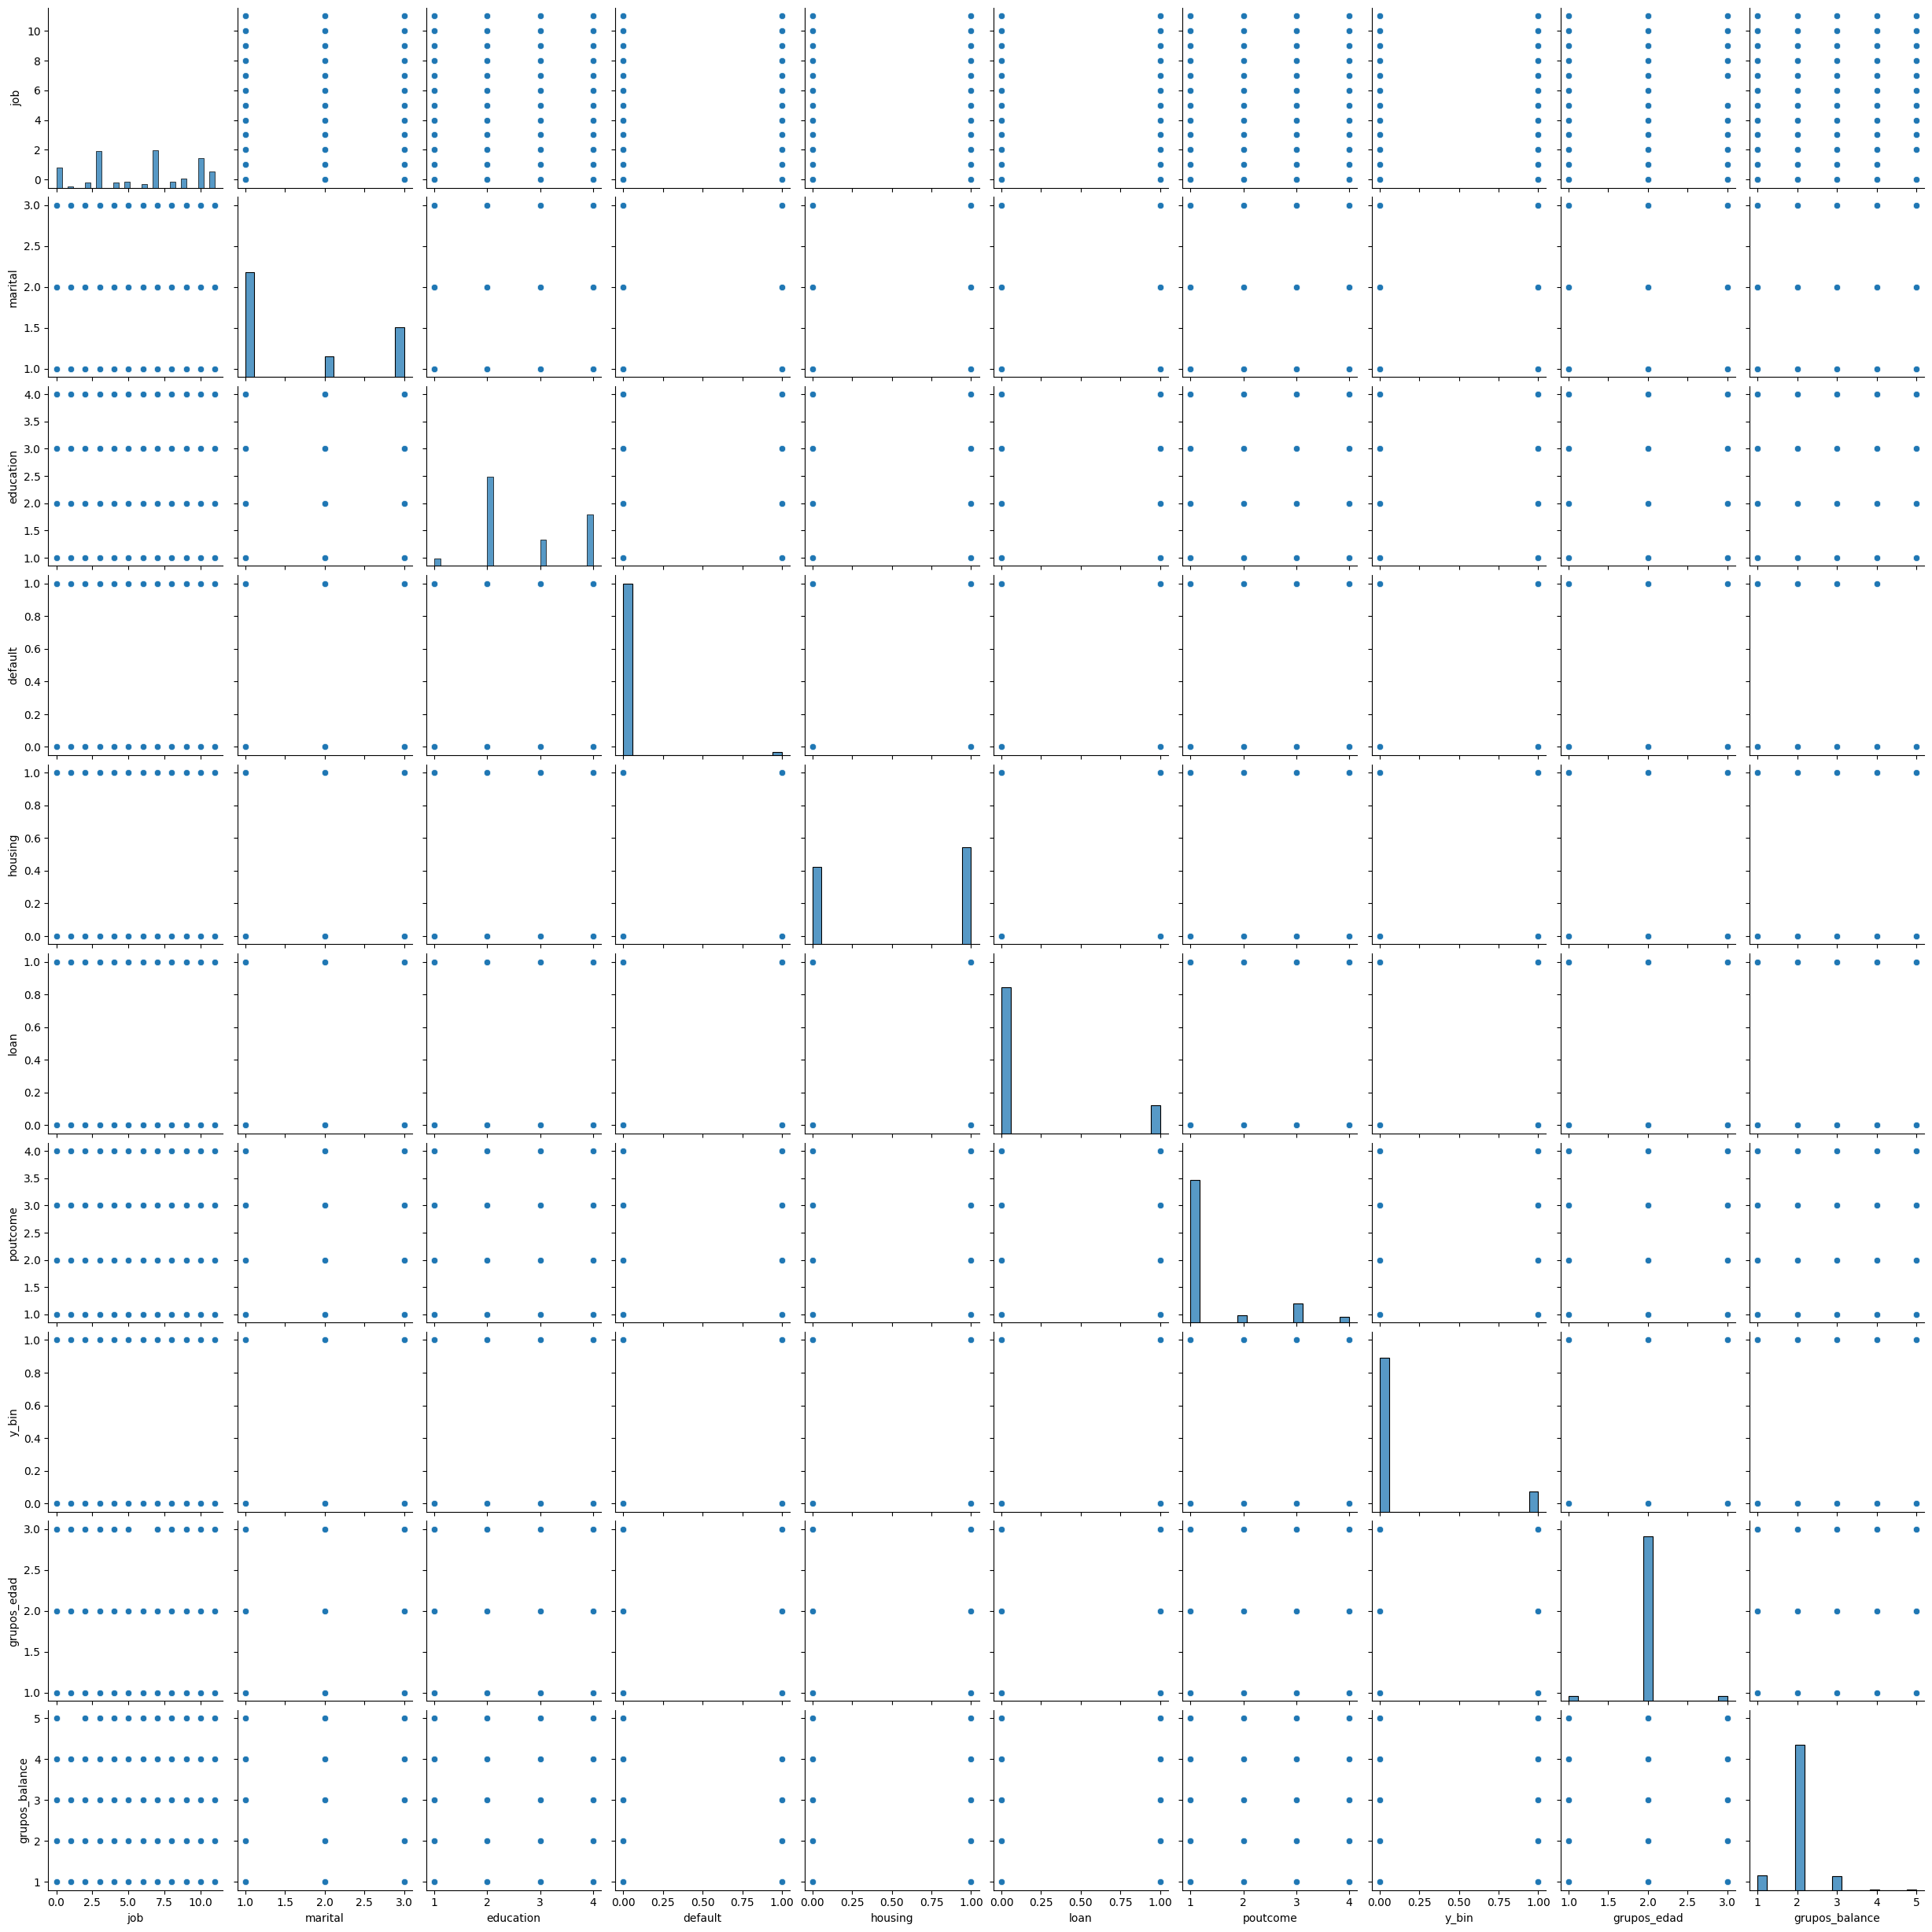

In [ ]:
sns.pairplot(clientes_Banco_Multi)

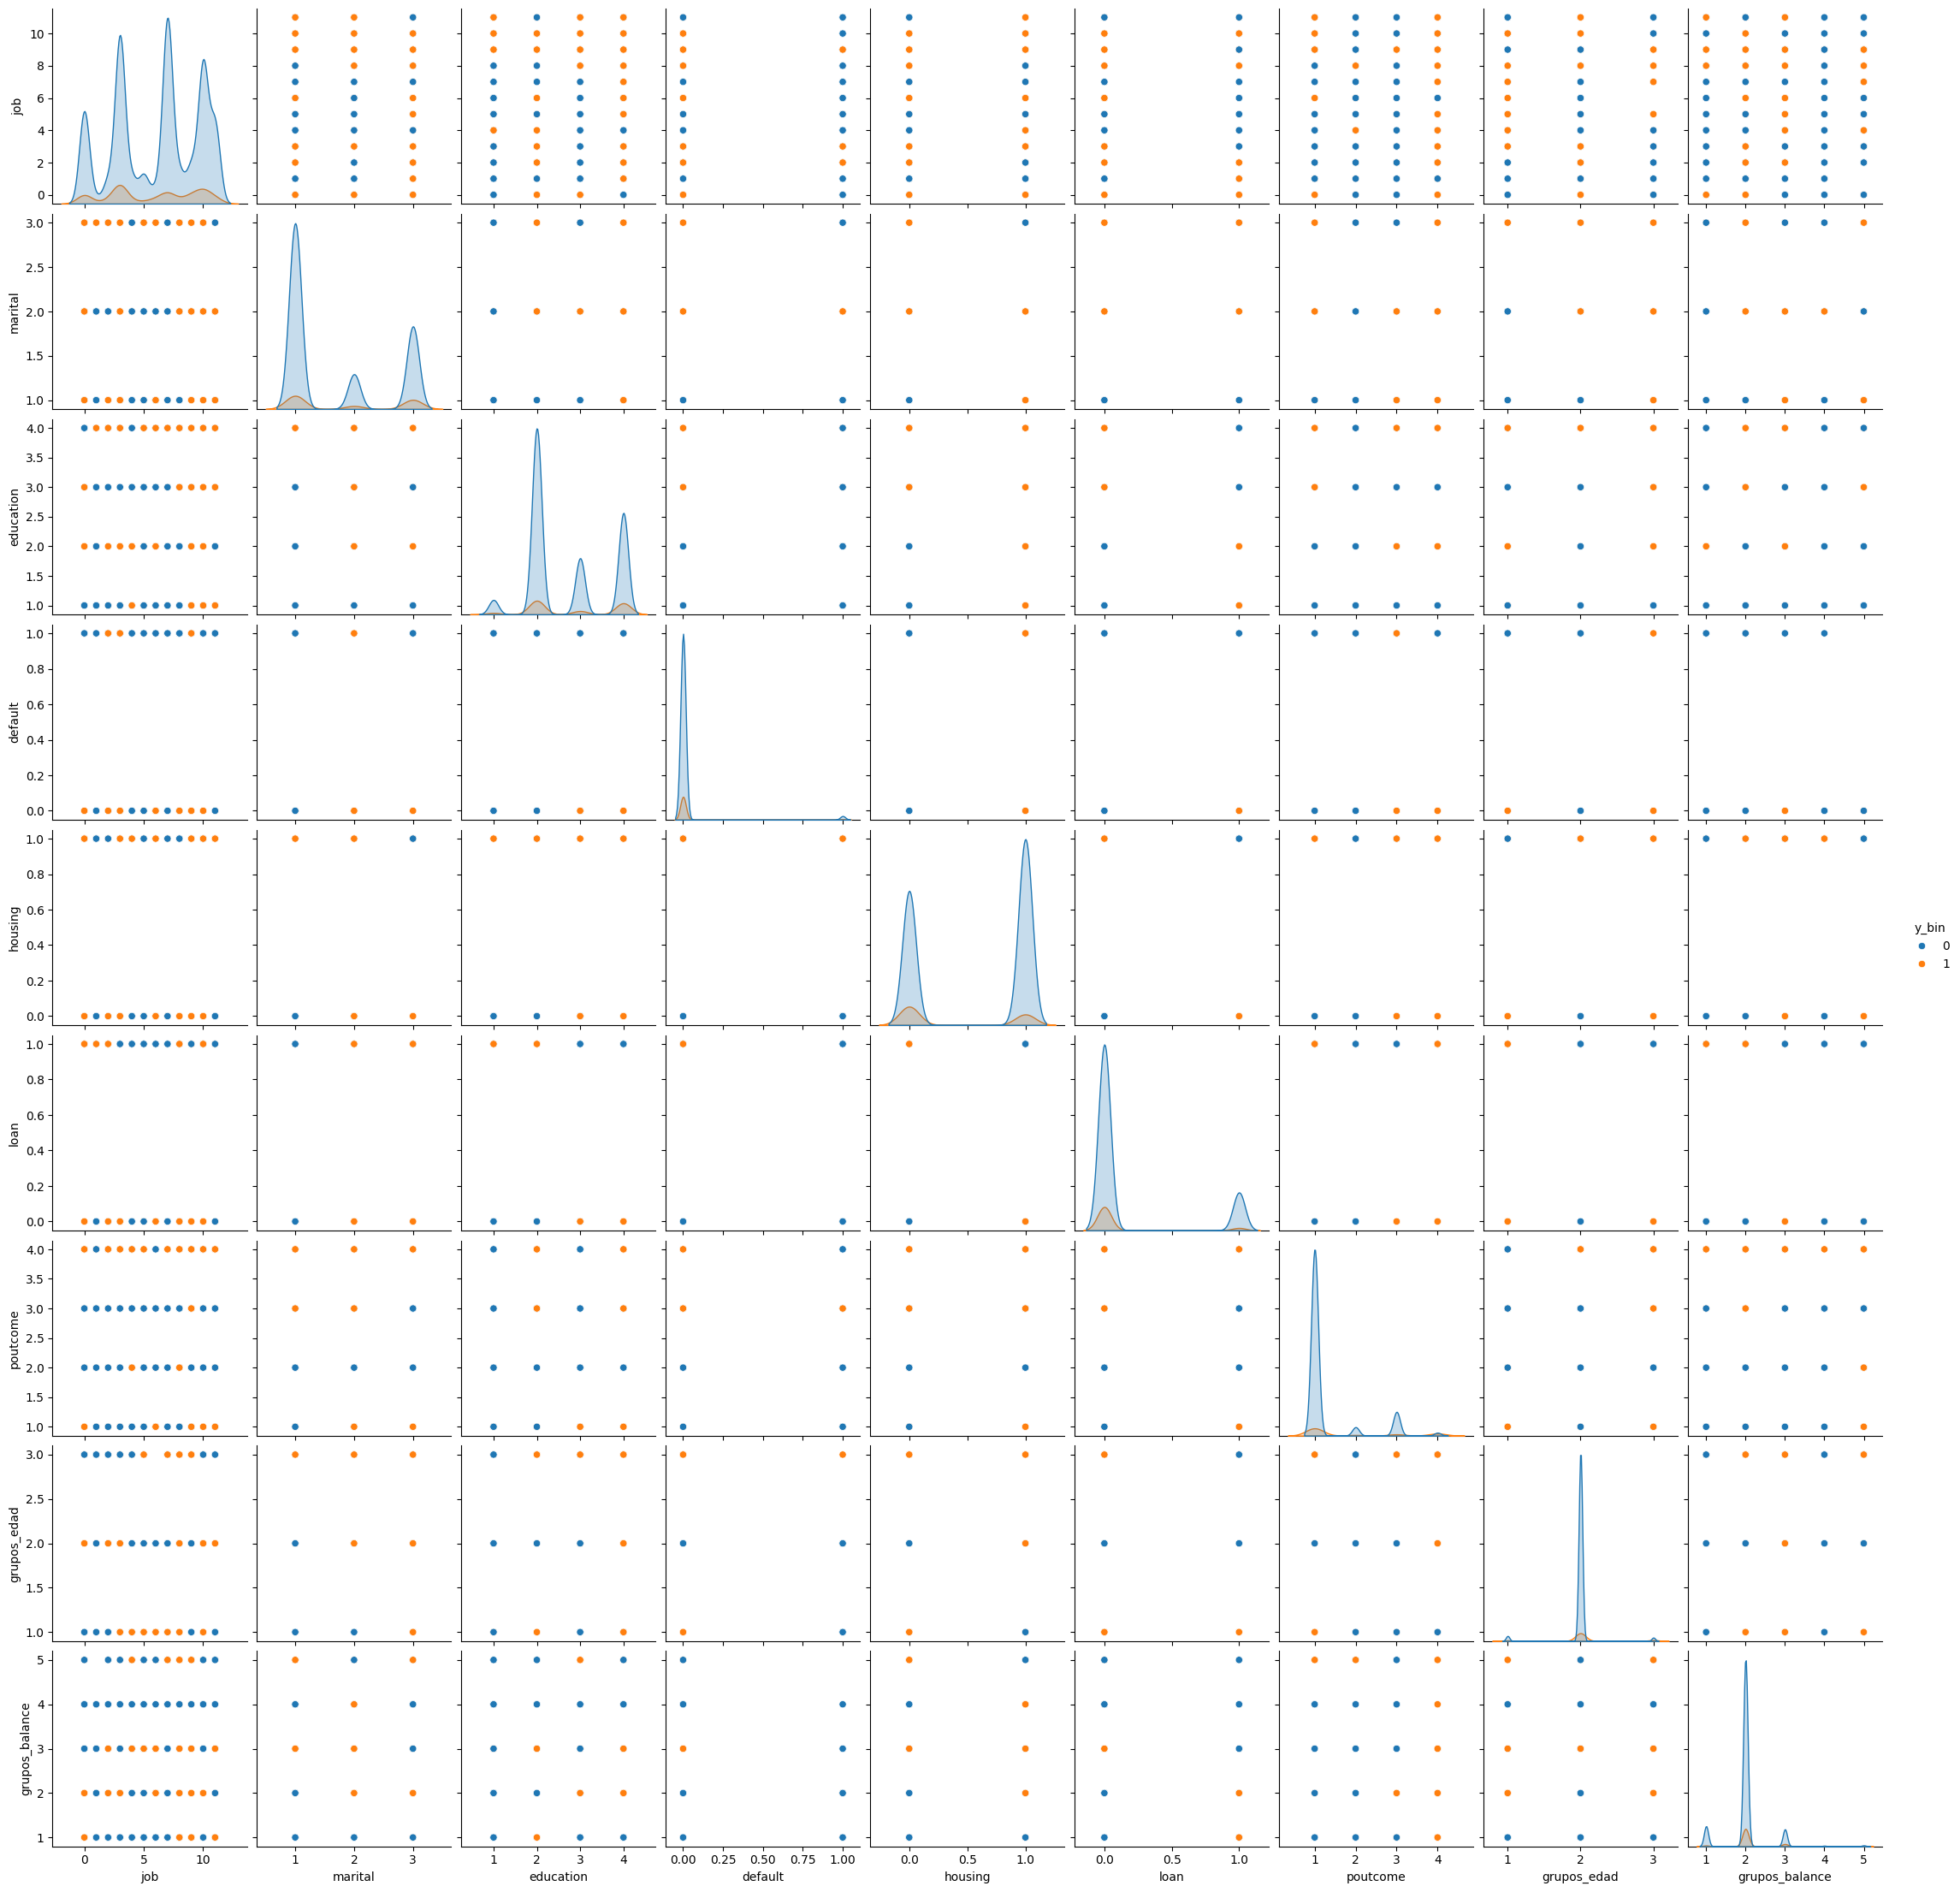

In [ ]:
sns.pairplot(clientes_Banco_Multi, hue = 'y_bin')

In [ ]:
corr_matrix = clientes_Banco_Multi.corr()
corr_matrix

,job,marital,education,default,housing,loan,poutcome,y_bin,grupos_edad,grupos_balance
job,1.000000,-0.034682,-0.209170,0.002835,0.035125,0.026107,-0.022464,-0.024733,0.046314,-0.037928
marital,-0.034682,1.000000,0.048558,0.009580,-0.020269,-0.046709,0.027350,0.065745,-0.201694,-0.014383
education,-0.209170,0.048558,1.000000,-0.013935,-0.082125,-0.038578,0.021960,0.046502,0.045553,0.084184
default,0.002835,0.009580,-0.013935,1.000000,-0.005986,0.077247,-0.039596,-0.022414,-0.010792,-0.161829
housing,0.035125,-0.020269,-0.082125,-0.005986,1.000000,0.041310,0.031098,-0.139111,-0.100255,-0.100874
loan,0.026107,-0.046709,-0.038578,0.077247,0.041310,1.000000,-0.040150,-0.068115,-0.034549,-0.128730
poutcome,-0.022464,0.027350,0.021960,-0.039596,0.031098,-0.040150,1.000000,0.221127,0.063343,0.045032
y_bin,-0.024733,0.065745,0.046502,-0.022414,-0.139111,-0.068115,0.221127,1.000000,0.057809,0.060257
grupos_edad,0.046314,-0.201694,0.045553,-0.010792,-0.100255,-0.034549,0.063343,0.057809,1.000000,0.060526
grupos_balance,-0.037928,-0.014383,0.084184,-0.161829,-0.100874,-0.128730,0.045032,0.060257,0.060526,1.000000


<Axes: >

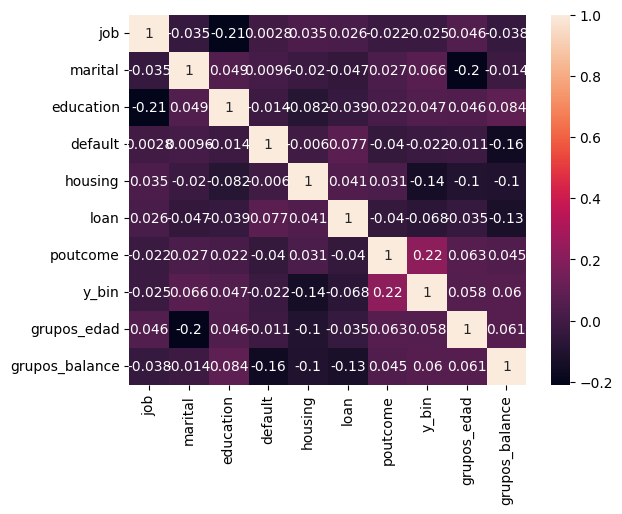

In [ ]:
sns.heatmap(corr_matrix, annot=True)

## Dado que entre tantas variables se pierde la informacion valiosa se utilizaran las variables identificadas en el proceso de analisis bivariado, para realizar el analisis multivariado.

In [ ]:
cov = clientes_Banco_Multi[['poutcome','housing', 'job','grupos_balance','grupos_edad','y_bin']]
cov

,poutcome,housing,job,grupos_balance,grupos_edad,y_bin
0,1,1,3.0,2,2,0
1,1,1,10.0,2,2,0
2,1,1,5.0,2,2,0
3,1,1,7.0,2,2,0
4,1,0,1.0,2,2,0
...,...,...,...,...,...,...
45184,1,0,10.0,2,2,1
45185,1,0,9.0,2,3,1
45186,4,0,9.0,3,3,1
45187,1,0,7.0,2,2,0


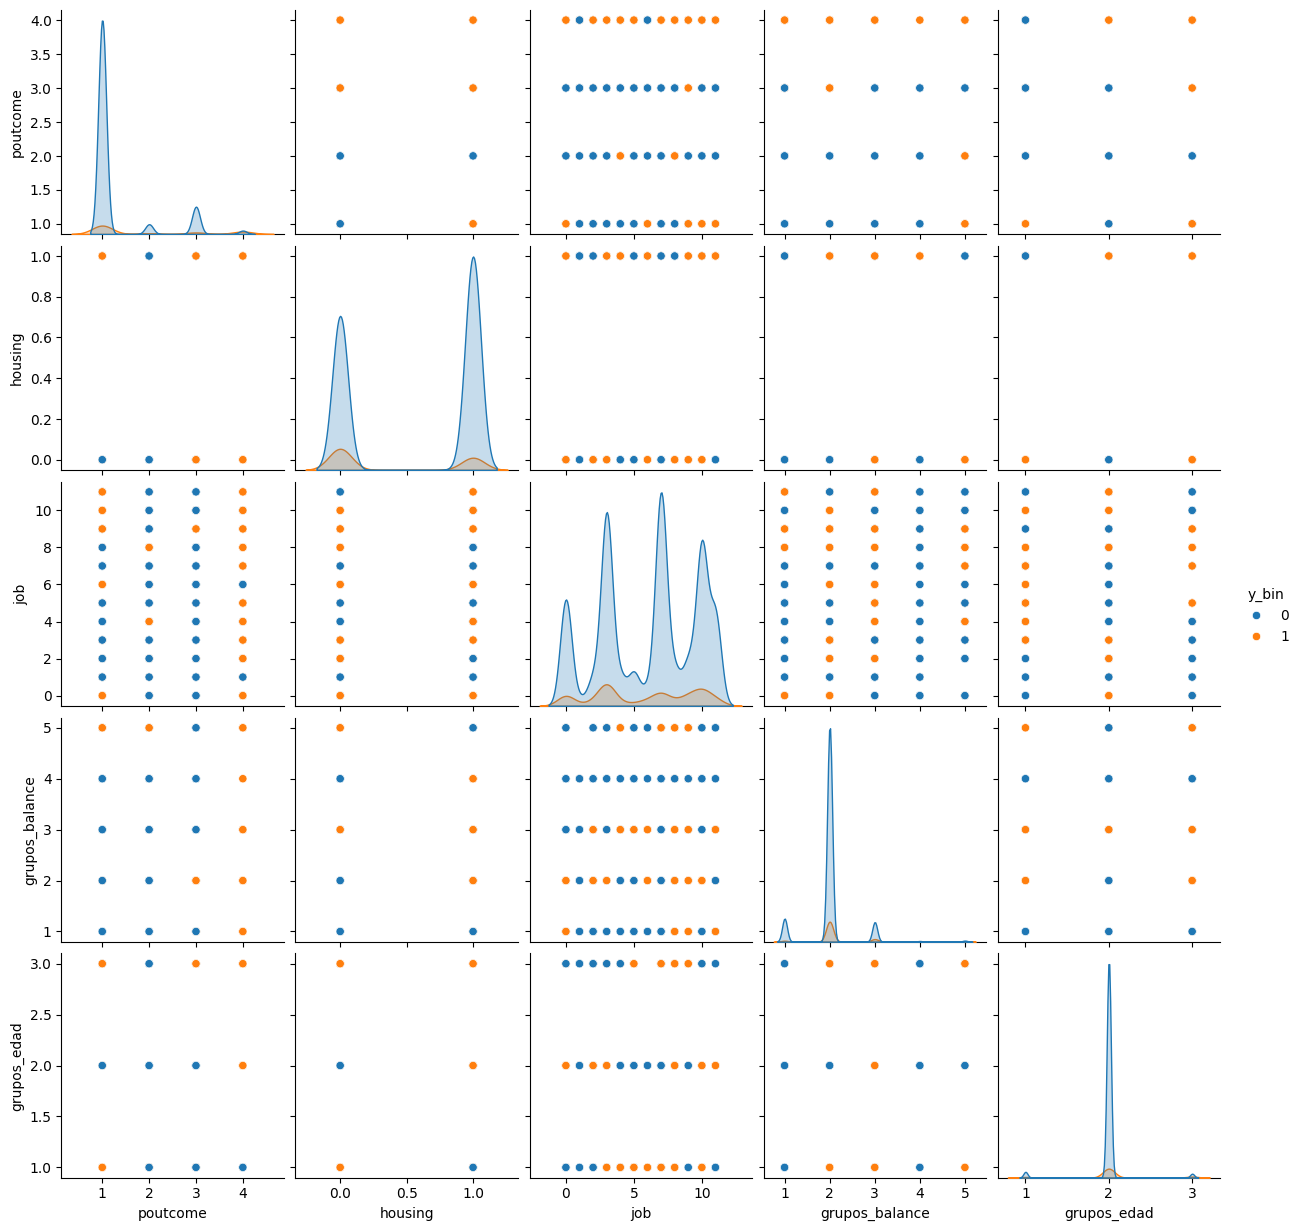

In [ ]:
sns.pairplot(cov, hue='y_bin')

In [ ]:
corr_matrix = cov.corr()
corr_matrix

,poutcome,housing,job,grupos_balance,grupos_edad,y_bin
poutcome,1.000000,0.031098,-0.022464,0.045032,0.063343,0.221127
housing,0.031098,1.000000,0.035125,-0.100874,-0.100255,-0.139111
job,-0.022464,0.035125,1.000000,-0.037928,0.046314,-0.024733
grupos_balance,0.045032,-0.100874,-0.037928,1.000000,0.060526,0.060257
grupos_edad,0.063343,-0.100255,0.046314,0.060526,1.000000,0.057809
y_bin,0.221127,-0.139111,-0.024733,0.060257,0.057809,1.000000


<Axes: >

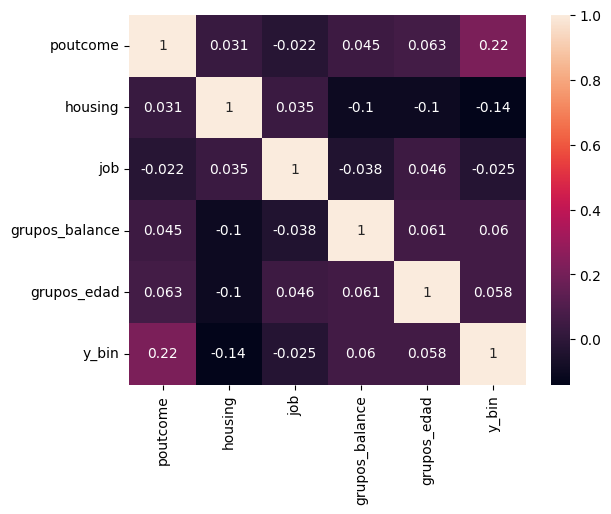

In [ ]:
sns.heatmap(corr_matrix, annot=True)

In [ ]:
#Cargamos los CSV con los Datos
clientes_Banco_Multi = pd.read_csv(base_dir + 'clientes_Banco_clean.csv')
clientes_Banco_Multi

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261.0,1,-1.0,0,unknown,no
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151.0,1,-1.0,0,unknown,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1,-1.0,0,unknown,no
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92.0,1,-1.0,0,unknown,no
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198.0,1,-1.0,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45184,51,technician,married,tertiary,no,825.0,no,no,cellular,17,nov,977.0,3,-1.0,0,unknown,yes
45185,71,retired,divorced,primary,no,1729.0,no,no,cellular,17,nov,456.0,2,-1.0,0,unknown,yes
45186,72,retired,married,secondary,no,5715.0,no,no,cellular,17,nov,1127.0,5,184.0,3,success,yes
45187,57,blue-collar,married,secondary,no,668.0,no,no,telephone,17,nov,508.0,4,-1.0,0,unknown,no


In [ ]:
clientes_Banco_Multi.drop(columns=['contact','month', 'day', 'duration', 'campaign', 'pdays',
                   'previous'],inplace=True)
clientes_Banco_Multi

,age,job,marital,education,default,balance,housing,loan,poutcome,y
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,no
1,44,technician,single,secondary,no,29.0,yes,no,unknown,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,no
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,no
4,33,unknown,single,unknown,no,1.0,no,no,unknown,no
...,...,...,...,...,...,...,...,...,...,...
45184,51,technician,married,tertiary,no,825.0,no,no,unknown,yes
45185,71,retired,divorced,primary,no,1729.0,no,no,unknown,yes
45186,72,retired,married,secondary,no,5715.0,no,no,success,yes
45187,57,blue-collar,married,secondary,no,668.0,no,no,unknown,no


In [ ]:
# 'yes' = 1, 'no' = 0, dado que en forma categorica se presta confusion
diccionario = {'yes':1, 'no':0}

#default
binario = clientes_Banco_Multi['default'].map(diccionario)
clientes_Banco_Multi['default'] = binario

#housing
binario = clientes_Banco_Multi['housing'].map(diccionario)
clientes_Banco_Multi['housing'] = binario


#loan
binario = clientes_Banco_Multi['loan'].map(diccionario)
clientes_Banco_Multi['loan'] = binario

#y
binario = clientes_Banco_Multi['y'].map(diccionario)
clientes_Banco_Multi['y'] = binario

clientes_Banco_Multi

,age,job,marital,education,default,balance,housing,loan,poutcome,y
0,58,management,married,tertiary,0,2143.0,1,0,unknown,0
1,44,technician,single,secondary,0,29.0,1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2.0,1,1,unknown,0
3,47,blue-collar,married,unknown,0,1506.0,1,0,unknown,0
4,33,unknown,single,unknown,0,1.0,0,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...
45184,51,technician,married,tertiary,0,825.0,0,0,unknown,1
45185,71,retired,divorced,primary,0,1729.0,0,0,unknown,1
45186,72,retired,married,secondary,0,5715.0,0,0,success,1
45187,57,blue-collar,married,secondary,0,668.0,0,0,unknown,0


In [ ]:
# Generemos el dataset únicamente con estos rangos y observemos el comportamiento

diccionario = {'unknown':1, 'other':2,'failure':3,'success':4}

#default
binario = clientes_Banco_Multi['poutcome'].map(diccionario)
clientes_Banco_Multi['poutcome'] = binario

clientes_Banco_Multi

,age,job,marital,education,default,balance,housing,loan,poutcome,y
0,58,management,married,tertiary,0,2143.0,1,0,1,0
1,44,technician,single,secondary,0,29.0,1,0,1,0
2,33,entrepreneur,married,secondary,0,2.0,1,1,1,0
3,47,blue-collar,married,unknown,0,1506.0,1,0,1,0
4,33,unknown,single,unknown,0,1.0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
45184,51,technician,married,tertiary,0,825.0,0,0,1,1
45185,71,retired,divorced,primary,0,1729.0,0,0,1,1
45186,72,retired,married,secondary,0,5715.0,0,0,4,1
45187,57,blue-collar,married,secondary,0,668.0,0,0,1,0


In [ ]:
cov = clientes_Banco_Multi[['poutcome','default','balance',
                            'age','housing','loan','y']]
cov

,poutcome,default,balance,age,housing,loan,y
0,1,0,2143.0,58,1,0,0
1,1,0,29.0,44,1,0,0
2,1,0,2.0,33,1,1,0
3,1,0,1506.0,47,1,0,0
4,1,0,1.0,33,0,0,0
...,...,...,...,...,...,...,...
45184,1,0,825.0,51,0,0,1
45185,1,0,1729.0,71,0,0,1
45186,4,0,5715.0,72,0,0,1
45187,1,0,668.0,57,0,0,0


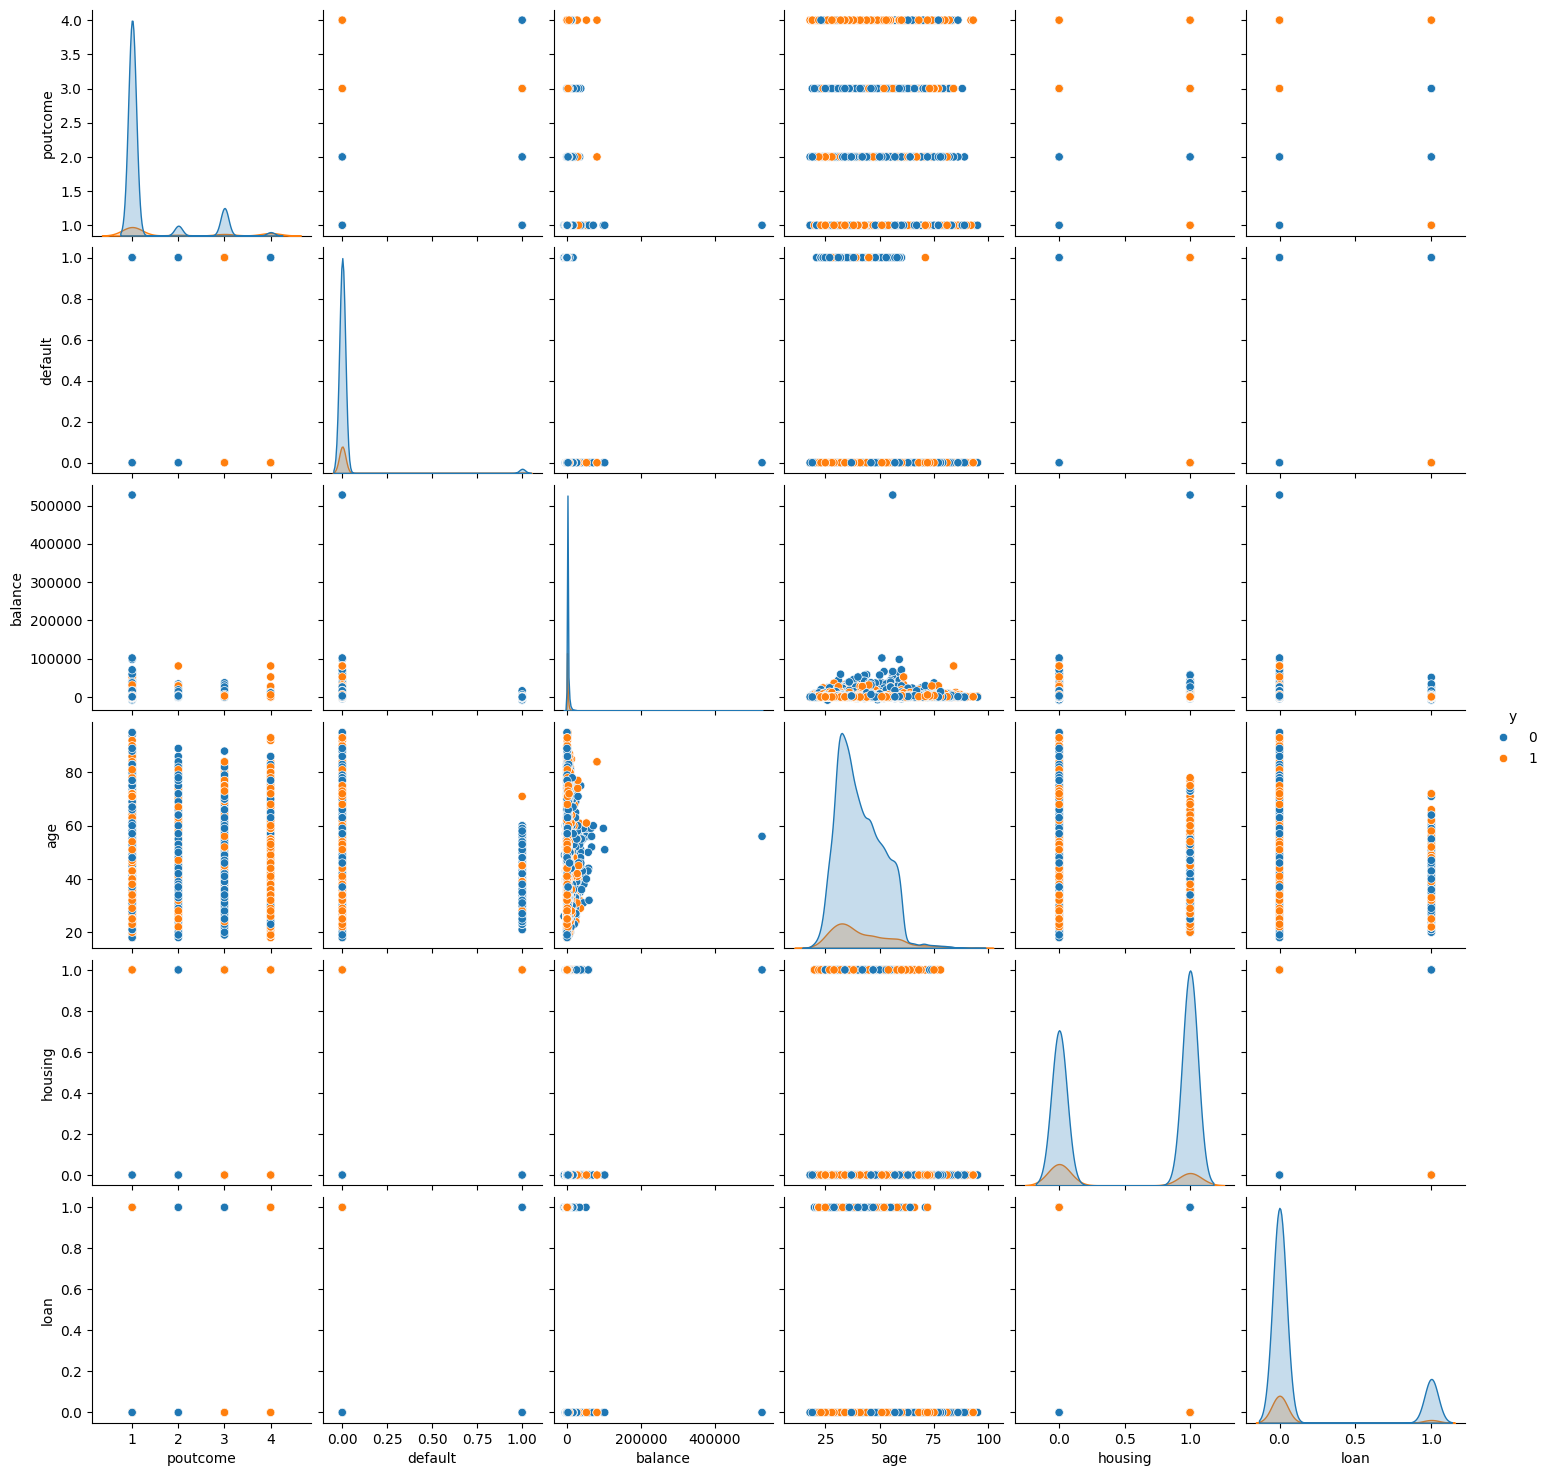

In [ ]:
sns.pairplot(cov, hue='y')

In [ ]:
corr_matrix = cov.corr()
corr_matrix

,poutcome,default,balance,age,housing,loan,y
poutcome,1.000000,-0.039596,0.025774,0.014454,0.031098,-0.040150,0.221127
default,-0.039596,1.000000,-0.052203,-0.017887,-0.005986,0.077247,-0.022414
balance,0.025774,-0.052203,1.000000,0.080120,-0.050669,-0.066707,0.039912
age,0.014454,-0.017887,0.080120,1.000000,-0.185480,-0.015469,0.024986
housing,0.031098,-0.005986,-0.050669,-0.185480,1.000000,0.041310,-0.139111
loan,-0.040150,0.077247,-0.066707,-0.015469,0.041310,1.000000,-0.068115
y,0.221127,-0.022414,0.039912,0.024986,-0.139111,-0.068115,1.000000


<Axes: >

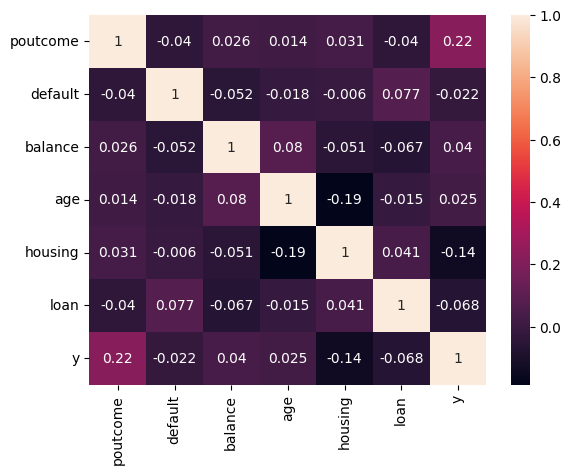

In [ ]:
sns.heatmap(corr_matrix, annot=True)

<p align="left"><b><font face='Courier New' color="white" align="left" size=4>Copyright.</font></b>
<img alt="GIIAM" height="120px" src="https://pascualbravo.edu.co/investigacion/giiam/" align="right" hspace="10px" vspace="0px" height="120" width="350"">
                                                                                                                              
<font face='Verdana' size="2.5">
Andres Fernando Perez G. <a href="https://scienti.minciencias.gov.co/cvlac/visualizador/generarCurriculoCv.do?cod_rh=0000347507">  CvLAC</a><br>
I.U Pascual Bravo.<br>
Calle 73 # 73A – 226<br>
Medellín, Colombia. South America.
    
</p>
</font>
    
</p>
</font>

<center><b><font color='01b3c2' face="Lucida Calligraphy,Comic Sans MS,Lucida Console" size="4">I.U Pascual Bravo.</font></b> </center>